<a href="https://colab.research.google.com/github/Kethan1712/GEN-AI-TASK-2/blob/main/Task_2_E_Commerce.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import random

electronics_reviews = [
    "This phone has an amazing camera and battery life.",
    "Absolutely love this laptop, very fast and lightweight.",
    "Tablet performance is great for the price.",
    "This smartwatch connects quickly and looks good.",
    "Battery life on this earbud is unbelievable.",
    "I enjoy using this gaming console every day.",
    "The speaker delivers crystal clear sound.",
    "Screen quality is stunning with high resolution.",
    "Headphones cancel noise very effectively.",
    "Very responsive touchscreen and sleek design."
]

clothing_reviews = [
    "The shirt fits perfectly and the material is soft.",
    "This dress is beautiful and fits well.",
    "Very stylish jacket, I wear it daily.",
    "This hoodie keeps me warm and looks good.",
    "These jeans are very comfortable to wear.",
    "I love the color and design of this kurti.",
    "Sweater is soft and keeps me cozy in winter.",
    "Pants fit true to size and are stretchable.",
    "Great quality t-shirt for daily use.",
    "The fabric feels premium and lightweight."
]

home_appliance_reviews = [
    "My washing machine broke down after a week of use.",
    "The blender stopped working after two uses.",
    "The fridge makes strange noises often.",
    "The mixer blades are already blunt.",
    "The air conditioner isn't cooling properly.",
    "Microwave heats food unevenly.",
    "Toaster doesn't toast bread evenly.",
    "Vacuum cleaner is too noisy.",
    "Dishwasher cleans dishes well but is slow.",
    "The fan speed is very low even at max."
]

# Repeat and shuffle to generate 100 training entries
train_texts = electronics_reviews * 3 + clothing_reviews * 3 + home_appliance_reviews * 3
train_labels = ["Electronics"] * len(electronics_reviews) * 3 + \
               ["Clothing"] * len(clothing_reviews) * 3 + \
               ["Home Appliances"] * len(home_appliance_reviews) * 3

combined = list(zip(train_texts, train_labels))
random.shuffle(combined)
train_texts, train_labels = zip(*combined)

train_data = {
    "review_text": train_texts,
    "product_category": train_labels
}


In [ ]:
import pandas as pd

train_df = pd.read_csv("ecommerce_reviews_train.csv")
test_df = pd.read_csv("ecommerce_reviews_test.csv")


In [ ]:
import re

def clean_text(text):
    text = text.lower()
    text = re.sub(r'[^a-z\s]', '', text)
    return text

train_df['clean_text'] = train_df['review_text'].apply(clean_text)
test_df['clean_text'] = test_df['review_text'].apply(clean_text)


In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y_train = le.fit_transform(train_df['product_category'])
y_test = le.transform(test_df['product_category'])


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()
X_train = vectorizer.fit_transform(train_df['clean_text'])
X_test = vectorizer.transform(test_df['clean_text'])


In [ ]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=200)
model.fit(X_train, y_train)


LogisticRegression(max_iter=200)

In [ ]:
from sklearn.metrics import classification_report, accuracy_score

y_pred = model.predict(X_test)

print(classification_report(y_test, y_pred, target_names=le.classes_))
print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")


                 precision    recall  f1-score   support

       Clothing       0.00      0.00      0.00         2
    Electronics       0.33      1.00      0.50         1
Home Appliances       1.00      1.00      1.00         2

       accuracy                           0.60         5
      macro avg       0.44      0.67      0.50         5
   weighted avg       0.47      0.60      0.50         5

Accuracy: 0.60


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


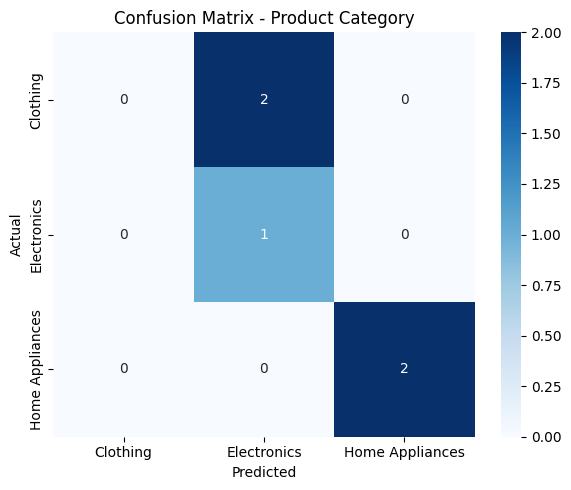

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=le.classes_, yticklabels=le.classes_)
plt.title("Confusion Matrix - Product Category")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()
